In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [37]:
!pip install matplotlib==3.1.0

     |████████████████████████████████| 14.4MB 7.3MB/s eta 0:00:01
ERROR: causalnex 0.4.3 has requirement scipy<1.3,>=1.2.0, but you'll have scipy 1.4.1 which is incompatible.
ERROR: causalnex 0.4.3 has requirement wrapt<1.12,>=1.11.0, but you'll have wrapt 1.12.1 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


I am going to test the models with every dataset to see which one works better.

In [2]:
data = pd.read_csv('../data/hmeq_clean.csv',index_col=0)
data_cat = pd.read_csv('../data/data_0.csv',index_col=0)
data_del_null = pd.read_csv('../data/hmeq_clean_del_null.csv',index_col=0)
data_del_debtinc = pd.read_csv('../data/hmeq_clean_del_debtinc.csv',index_col=0)
data_del_null_cat = pd.read_csv('../data/data_1.csv',index_col=0)
data_del_debtinc_cat = pd.read_csv('../data/data_2.csv',index_col=0)
data_norm = pd.read_csv('../data/hmeq_normalised_0.csv',index_col=0)
data_norm_cat = pd.read_csv('../data/hmeq_normalised_1.csv',index_col=0)
data_norm_del_null = pd.read_csv('../data/hmeq_normalised_2.csv',index_col=0)
data_norm_del_debtinc = pd.read_csv('../data/hmeq_normalised_3.csv',index_col=0)
data_norm_del_null_cat = pd.read_csv('../data/hmeq_normalised_4.csv',index_col=0)
data_norm_del_debtinc_cat = pd.read_csv('../data/hmeq_normalised_5.csv',index_col=0)

In [3]:
dfs = [data,data_cat,data_del_null,data_del_debtinc,data_del_null_cat,data_del_debtinc_cat,
      data_norm,data_norm_cat,data_norm_del_null,data_norm_del_debtinc,data_norm_del_null_cat,
      data_norm_del_debtinc_cat]

In [43]:
def how_many_clusters(df,n):
    X = df
    model = KMeans(n_clusters=n)
    labels = model.fit_predict(X)
    df_copy = df.copy()
    df_copy['LABELS'] = labels
    ct = pd.crosstab(df_copy.BAD,[df_copy["LABELS"]]);
    #display(ct)
    plt.figure();
    display(sns.heatmap(ct));
    return ct;

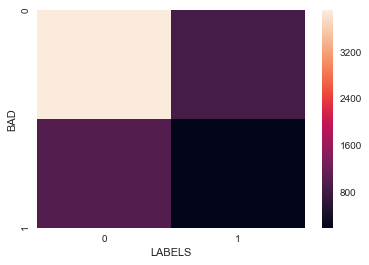

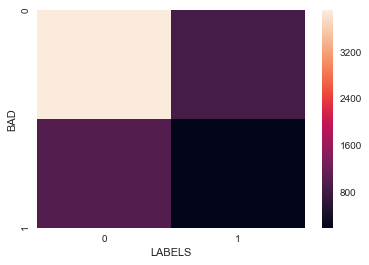

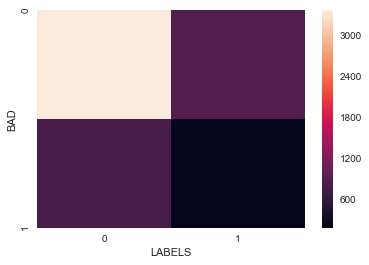

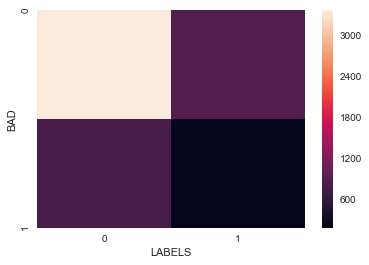

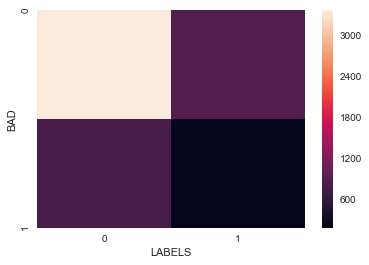

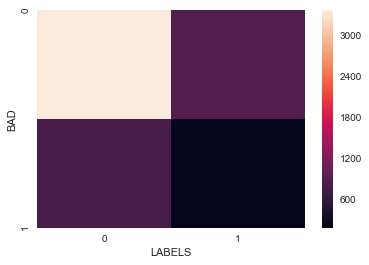

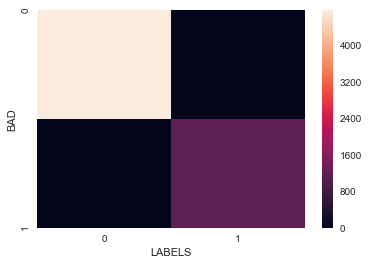

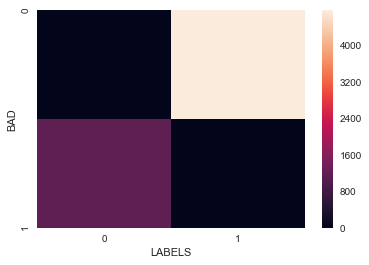

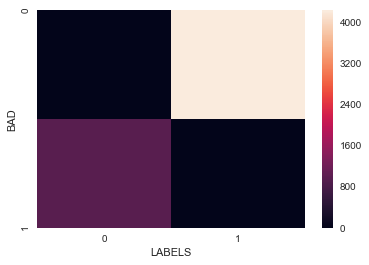

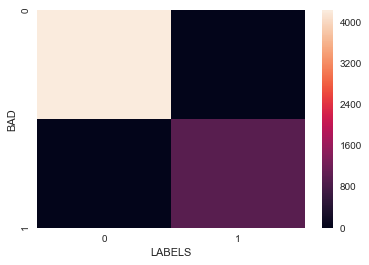

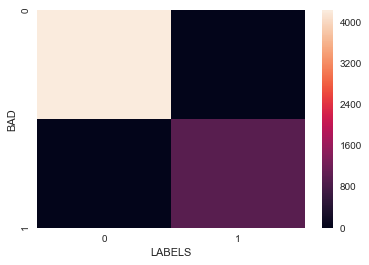

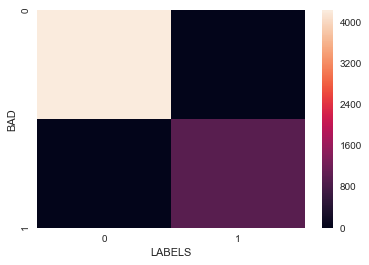

In [44]:
for n,df in enumerate(dfs):
    how_many_clusters(df,2);
# The datasets that work best are the ones that are normalised

In [46]:
"""
for n,df in enumerate(dfs[6:10]):
    print("I am testing the dataframe number {n}".format(n=n))
    how_many_clusters(df,4)
"""

'\nfor n,df in enumerate(dfs[6:10]):\n    print("I am testing the dataframe number {n}".format(n=n))\n    how_many_clusters(df,4)\n'

In [7]:
!pip install yellowbrick

I will use 4 clusters because its easier to move one result from cluster to cluster. 

2    1807
1    1253
3    1164
0     973
Name: LABELS, dtype: int64


LABELS,0,1,2,3
BAD,,,,
0,0,1253,1807,1164
1,973,0,0,0


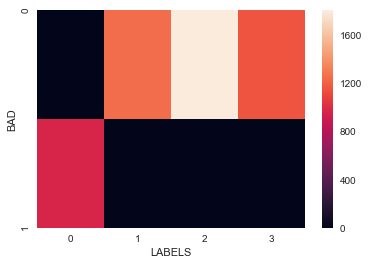

In [57]:
X = dfs[8]
model_cluster = KMeans(n_clusters=4)
labels = model_cluster.fit_predict(X)
dfs8_copy = dfs[8].copy()
dfs8_copy['LABELS'] = labels
print(dfs8_copy.LABELS.value_counts())
ct = pd.crosstab(dfs8_copy.BAD,[dfs8_copy["LABELS"]])
display(ct)
plt.figure()
display(sns.heatmap(ct))

In [58]:
tom = dfs[8].loc[1].copy() 
model_cluster2.predict(pd.DataFrame(tom).T)[0] # Zero means Tom does not pay

0

In [59]:
tom = dfs[8].loc[1].copy() 
# Only change Loan, Mortdue, YOJ and clage.
def change_cluster():
    while model_cluster.predict(pd.DataFrame(tom).T)[0]==0:
        tom['LOAN'] *=  1.1
        if tom['MORTDUE'] > 1:
            tom['MORTDUE'] -= 0.1
        tom['YOJ'] += 0.1
        tom['CLAGE'] += 0.1
    return model_cluster.predict(pd.DataFrame(tom).T)[0]
change_cluster()

3

Once the data is normalized, I can not find the solution.

In [60]:
tom

LOAN             -4.110117
MORTDUE          -0.020623
VALUE            -0.163882
YOJ               2.450689
DEROG            -0.068153
DELINQ            0.357556
CLAGE             2.340246
NINQ             -0.164769
CLNO             -0.196296
DEBTINC          -0.422943
REASON_DebtCon   -0.385931
REASON_HomeImp    0.385931
JOB_Mgr          -0.096053
JOB_Office       -0.108555
JOB_Other         0.289665
JOB_ProfExe      -0.133676
JOB_Sales        -0.033586
JOB_Self         -0.044821
BAD               1.000000
Name: 1, dtype: float64

Dataframe number 8, the one I have used, is dataframe number 2 after applying StandardScaler and normalizer. So I am going to calculate the inverse normalizer and standardScaler, to do that, I do the whole process again to dataframe number 2, to follow the steps backwards and verify I am doing it correctly.

In [61]:
sc = StandardScaler()
nz = Normalizer()
X = dfs[2].drop(columns=['BAD'])
y = dfs[2]['BAD']
info = sc.fit_transform(X)
info = pd.DataFrame(info,columns=X.columns)
norm = [np.linalg.norm(row) for i,row in info.iterrows()]
info = nz.fit_transform(info)

info = pd.DataFrame(info,columns=X.columns)

info['BAD'] = list(y)
info['NORM'] = norm
X.head()

/Users/luciasuelves/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/luciasuelves/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,0.000000,0,1,0,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,0.000000,0,1,0,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,0.000000,0,1,0,0,1,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,0.000000,0,1,0,1,0,0,0,0
5,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0


In [63]:
norm_tom = np.linalg.norm(tom.values) # The new tom that passes the test
result = pd.Series(tom.values/norm_tom)
X = list(dfs[2].drop(columns=['BAD']).columns)
X.append('BAD')
result = pd.DataFrame(result).T
result.columns = X
result['NORM'] = norm_tom
wtf = pd.concat([info,result]) # We replace old tom for new tom
wtf = wtf.drop(1)
wtf = info
display(wtf.head())
wtf=wtf.apply(lambda x: x*x['NORM'], axis=1) # inverse of the norm
display(wtf.head())
wtf.drop(columns=['NORM','BAD'],inplace=True)
final = pd.DataFrame(sc.inverse_transform(wtf),columns=wtf.columns) # inverse of standard scaler
display(final.head())
display(final.loc[1]) # NEW tom (passes the test)
display(dfs[2].loc[1]) # OLD tom

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,BAD,NORM
0,-0.369165,-0.251456,-0.283323,0.059355,-0.065572,-0.089876,-0.228682,-0.021377,-0.306029,-0.406928,-0.371317,0.371317,-0.092416,-0.104444,0.278696,-0.128614,-0.032314,-0.043123,1,4.290249
1,-0.379347,-0.020623,-0.163882,-0.049311,-0.068153,0.357556,-0.159754,-0.164769,-0.196296,-0.422943,-0.385931,0.385931,-0.096053,-0.108555,0.289665,-0.133676,-0.033586,-0.044821,1,4.127791
2,-0.352151,-0.308653,-0.369733,-0.135653,-0.064000,-0.087721,-0.076395,-0.020864,-0.275821,-0.397172,-0.362415,0.362415,-0.090201,-0.101940,0.272015,-0.125531,-0.031539,-0.042090,1,4.395628
3,-0.343603,0.120996,0.027764,-0.163313,-0.063179,-0.086596,-0.223054,-0.152744,-0.181970,-0.392076,-0.357765,0.357765,-0.089043,0.501192,-0.187827,-0.123920,-0.031134,-0.041550,0,4.452762
4,-0.390445,-0.248407,-0.304133,0.014873,-0.071792,-0.098401,-0.229156,-0.023404,-0.360713,0.157617,-0.406538,0.406538,-0.101182,-0.114351,0.305132,-0.140814,-0.035379,-0.047214,1,3.918558


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,BAD,NORM
0,-1.583809,-1.078808,-1.215526,0.254648,-0.281321,-0.385590,-0.981104,-0.091711,-1.312941,-1.745820,-1.593041,1.593041,-0.396489,-0.448091,1.195676,-0.551786,-0.138634,-0.18501,4.290249,18.406234
1,-1.565867,-0.085126,-0.676470,-0.203545,-0.281321,1.475917,-0.659430,-0.680134,-0.810267,-1.745820,-1.593041,1.593041,-0.396489,-0.448091,1.195676,-0.551786,-0.138634,-0.18501,4.127791,17.038658
2,-1.547924,-1.356724,-1.625208,-0.596282,-0.281321,-0.385590,-0.335804,-0.091711,-1.212407,-1.745820,-1.593041,1.593041,-0.396489,-0.448091,1.195676,-0.551786,-0.138634,-0.18501,4.395628,19.321543
3,-1.529982,0.538766,0.123626,-0.727194,-0.281321,-0.385590,-0.993205,-0.680134,-0.810267,-1.745820,-1.593041,1.593041,-0.396489,2.231689,-0.836347,-0.551786,-0.138634,-0.18501,0.000000,19.827086
4,-1.529982,-0.973398,-1.191762,0.058280,-0.281321,-0.385590,-0.897960,-0.091711,-1.413476,0.617632,-1.593041,1.593041,-0.396489,-0.448091,1.195676,-0.551786,-0.138634,-0.18501,3.918558,15.355097


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100.0,25860.0,39025.0,10.5,-5.551115e-17,-1.110223e-16,94.366667,1.000000e+00,9.0,-3.552714e-15,-1.110223e-16,1.0,-2.775558e-17,-2.775558e-17,1.0,-5.551115e-17,-3.469447e-18,-6.938894e-18
1,1300.0,70053.0,68400.0,7.0,-2.775558e-17,2.000000e+00,121.833333,0.000000e+00,14.0,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00
2,1500.0,13500.0,16700.0,4.0,-2.775558e-17,0.000000e+00,149.466667,1.000000e+00,10.0,3.552714e-15,0.000000e+00,1.0,2.775558e-17,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00
3,1700.0,97800.0,112000.0,3.0,-2.775558e-17,0.000000e+00,93.333333,-2.220446e-16,14.0,0.000000e+00,0.000000e+00,1.0,-2.775558e-17,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
4,1700.0,30548.0,40320.0,9.0,-2.775558e-17,0.000000e+00,101.466002,1.000000e+00,8.0,3.711361e+01,0.000000e+00,1.0,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00


LOAN              1.300000e+03
MORTDUE           7.005300e+04
VALUE             6.840000e+04
YOJ               7.000000e+00
DEROG            -2.775558e-17
DELINQ            2.000000e+00
CLAGE             1.218333e+02
NINQ              0.000000e+00
CLNO              1.400000e+01
DEBTINC           0.000000e+00
REASON_DebtCon    0.000000e+00
REASON_HomeImp    1.000000e+00
JOB_Mgr           0.000000e+00
JOB_Office        0.000000e+00
JOB_Other         1.000000e+00
JOB_ProfExe       0.000000e+00
JOB_Sales         0.000000e+00
JOB_Self          0.000000e+00
Name: 1, dtype: float64

BAD                   1.000000
LOAN               1300.000000
MORTDUE           70053.000000
VALUE             68400.000000
YOJ                   7.000000
DEROG                 0.000000
DELINQ                2.000000
CLAGE               121.833333
NINQ                  0.000000
CLNO                 14.000000
DEBTINC               0.000000
REASON_DebtCon        0.000000
REASON_HomeImp        1.000000
JOB_Mgr               0.000000
JOB_Office            0.000000
JOB_Other             1.000000
JOB_ProfExe           0.000000
JOB_Sales             0.000000
JOB_Self              0.000000
Name: 1, dtype: float64

Another approach: I am going to try to equilibrate the data, and I am going to get the clusters more significant for the people who pay.

In [64]:
data[data['BAD']==1].shape

(1189, 19)

In [65]:
df = dfs[2]
X = df.drop(columns=['BAD'])
model = KMeans(n_clusters=2)
labels = model.fit_predict(X)
positive_index = [i for i,num in enumerate(model.labels_) if num == 1 and dfs[1].loc[i]['BAD']==0]
negative_index = [i for i,num in enumerate(model.labels_) if num == 0 and dfs[1].loc[i]['BAD']==1]
df_pos = dfs[2].loc[positive_index].dropna()
df_neg = dfs[2].loc[negative_index].dropna()
print(df_pos.shape,df_neg.shape)

(738, 19) (698, 19)


/Users/luciasuelves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/Users/luciasuelves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [66]:
data_reduced = pd.concat([df_pos,df_neg])

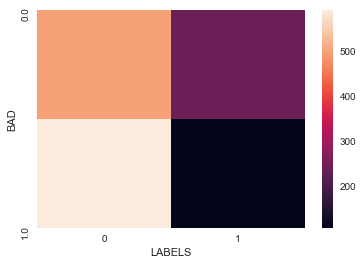

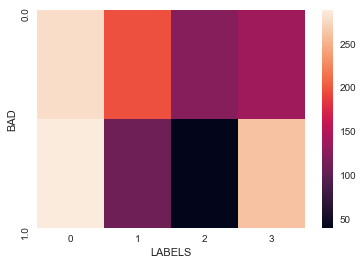

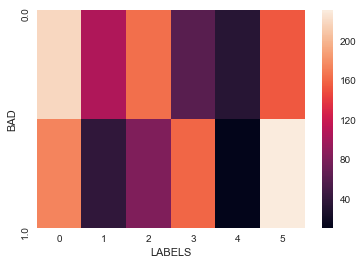

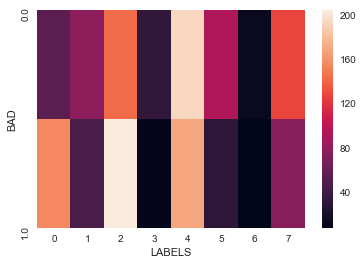

In [67]:
for i in range(2,10,2):
    how_many_clusters(data_reduced,i) # Does not work.

It didn't work!